In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# Use os.join.path so any OS can run this code
file_path = os.path.join("..", "Cleaned Data", "population_density_clean.csv")

# Read the csv into a data frame and display the first few rows
population_df = pd.read_csv(file_path)
population_df.head()

,Country Name,Country Code,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,348.022222,343.516667,339.327778,339.066667,345.272222,359.011111,379.083333,402.800000,...,562.344444,563.100000,563.638889,564.827778,566.922222,569.777778,573.105556,576.522222,579.672222,582.622222
1,Afghanistan,AFG,17.976563,17.774920,17.795553,18.179820,19.012205,20.370396,22.187829,24.226638,...,41.510486,42.462819,43.492959,44.704082,46.131503,47.730564,49.428038,51.114778,52.712072,54.197114
2,Angola,AGO,8.277943,8.574035,8.877878,9.188078,9.503799,9.825059,10.152696,10.487727,...,16.768559,17.402450,18.059101,18.734456,19.427818,20.139513,20.867715,21.610475,22.366552,23.135064
3,Albania,ALB,110.315146,112.540328,114.683796,117.808139,119.946788,119.225912,118.505073,117.784197,...,108.394781,107.566204,106.843759,106.314635,106.029015,105.854051,105.660292,105.441752,105.135146,104.967190
4,Andorra,AND,98.972340,103.095745,107.306383,111.591489,115.976596,120.576596,125.293617,129.725532,...,175.923404,178.429787,179.708511,179.678723,178.185106,175.376596,171.859574,168.538298,165.980851,164.461702


In [3]:
# Create a variable to store the column names
x = population_df.columns

# Create a variable that has a list of all the years
years = [x[name] for name in range(2, len(x))]

Text(0.5, 1.0, 'Population Density over Time')

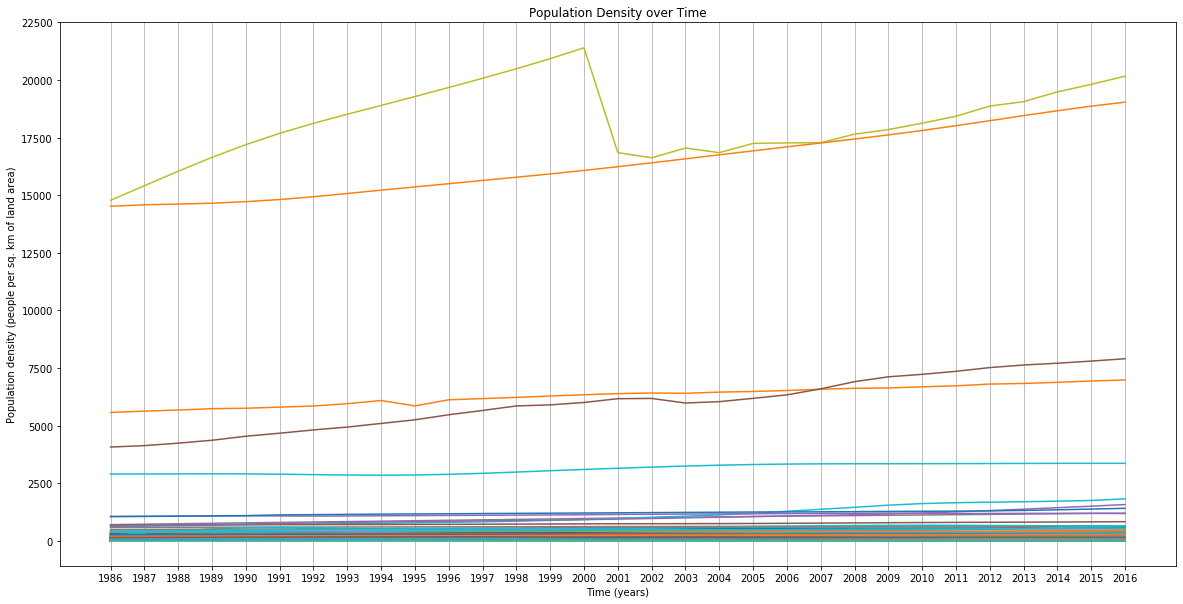

In [4]:
# Plot all of the data as a line plot showing years on the x-axis and change in population density on the y-axis
plt.figure(figsize=(20,10))
for country in population_df["Country Name"]:
    population_density = population_df.loc[population_df["Country Name"] == country,"1986":"2016"].values.flatten().tolist()
    plt.plot(years, population_density)
plt.yticks(np.arange(0, 25000, 2500));
plt.grid(axis="x")
plt.ylabel("Population density (people per sq. km of land area)")
plt.xlabel("Time (years)")
plt.title("Population Density over Time")


In [5]:
# Since it appears as though most of the countries don't really change too much, let's look at the top 5 countries with the largest change

# Create a new dataframe and set the columns
top_5 = pd.DataFrame(columns=x)

# Create a list of starting values from the first year in the data
starting_year = population_df["1986"].tolist()

# Find the top 5 highest starting populations and store them in a data frame
for x in range(0,5):
    max_value = max(starting_year)
    top_5 = top_5.append(population_df.loc[population_df["1986"] == max_value])
    starting_year.remove(max_value)
    
# Display the data frame
top_5

,Country Name,Country Code,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
138,"Macao SAR, China",MAC,14779.550000,15409.000000,16038.650000,16639.150000,17190.400000,17681.300000,18115.550000,18509.950000,...,17277.773521,17645.170772,17844.067508,18121.851677,18422.474858,18864.180542,19055.181698,19478.812065,19805.427880,20159.079200
141,Monaco,MCO,14520.500000,14584.000000,14614.500000,14652.500000,14719.000000,14811.000000,14932.500000,15073.000000,...,17262.500000,17436.000000,17613.000000,17806.000000,18012.000000,18230.000000,18450.500000,18661.000000,18859.000000,19035.000000
91,"Hong Kong SAR, China",HKG,5580.404040,5636.868687,5684.444444,5743.636364,5762.121212,5810.101010,5859.090909,5960.606061,...,6586.952381,6626.476190,6640.761905,6689.714286,6734.857143,6809.619048,6837.047619,6885.238095,6944.095238,6987.238095
195,Singapore,SGP,4079.661194,4141.476119,4247.922388,4374.479104,4547.958209,4679.228358,4821.937313,4945.479104,...,6602.300719,6913.422857,7125.104286,7231.812280,7363.193022,7524.698463,7636.721687,7714.702232,7806.772752,7908.720563
79,Gibraltar,GIB,2909.400000,2911.500000,2915.900000,2918.700000,2914.700000,2902.200000,2884.000000,2867.500000,...,3351.700000,3355.900000,3356.500000,3358.500000,3361.200000,3364.600000,3369.200000,3372.500000,3373.600000,3373.700000


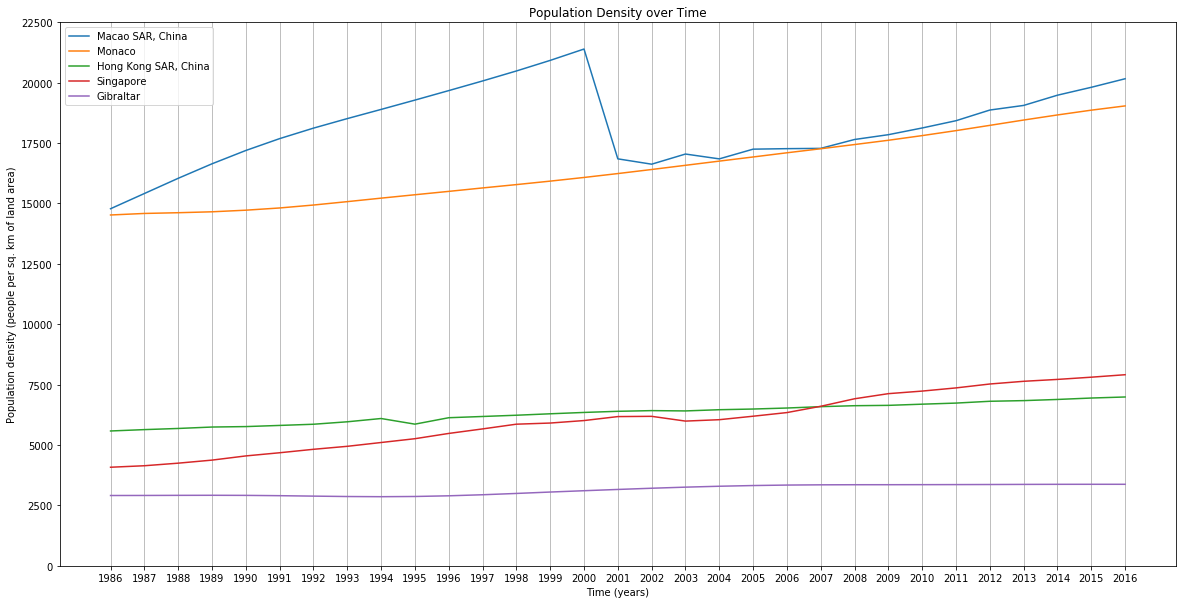

In [7]:
# Plot and display the top 5 countries with the largest change, display a legend so we can see which countries they are
plt.figure(figsize=(20,10))
labels = []
for country in top_5["Country Name"]:
    population_density = top_5.loc[top_5["Country Name"] == country,"1986":"2016"].values.flatten().tolist()
    plt.plot(years, population_density)
    labels.append(country)
plt.yticks(np.arange(0, 25000, 2500));
plt.grid(axis="x")
plt.ylabel("Population density (people per sq. km of land area)")
plt.xlabel("Time (years)")
plt.title("Population Density over Time")
plt.legend(labels=labels);